# Using K Nearest Neighbours to Predict Car Prices

this project uses a data set containing features of cars , and their price
the goal of this project is to select key features and use them to determine the price


In [1]:
#package imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline

pd.set_option("display.max_columns", 50)

In [2]:
#read data
names = ['symboling', 'normalized_losses', 'make', 'fuel_type',
         'aspiration', 'num_doors','body_style', 'drive_wheels',
         'engine_location', 'wheel_base','length', 'width', 'height',
         'curb_weight', 'engine_type', 'num_cylinders', 'engine_size',
         'fuel_system', 'bore', 'stroke', 'compression_ratio',
         'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
cars = pd.read_csv("imports-85.data", names = names, na_values="?")

In [3]:
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [4]:
cars.describe(include='all')

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,205.000000,164.000000,205,205,205,203,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
unique,NaN,NaN,22,2,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,185,168,114,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.834146,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,126.907317,NaN,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,41.642693,NaN,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,141.000000,NaN,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000


Numeric:
symboling, normalized_losses, wheelbase, length, width, height, curb_weight, engine_size, bore, stroke, compression_ratio, horsepower, peak_rpm, city_mpg, highway_mpg, price

contain numerical values, but require cleaning or fixing:
num_doors, num_cylinders

In [5]:
print(cars['num_cylinders'].value_counts())
print(cars['num_doors'].value_counts())

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: num_cylinders, dtype: int64
four    114
two      89
Name: num_doors, dtype: int64


In [6]:
#clean doors and cylinders columns
text_to_num_map = {'two':2, 'three':3, 'four':4,
                   'five':5, 'six':6, 'eight':8, 'twelve':12}
cars['num_cylinders'] = cars['num_cylinders'].map(text_to_num_map)
cars['num_doors'] = cars['num_doors'].map(text_to_num_map)

# Handle missing values

In [7]:
cars.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_doors             2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

Price contains 4 missing values. This is the column we are predicting to, so all nan rows will be dropped.

In [8]:
cars = cars.dropna(axis=0, subset=['price'])

Arbitrarily replace other values with the mean

In [9]:
cars = cars.fillna(cars.mean())

# Use Feature scaling to normalize values

    x' = (x - min(x)) / (max(x) - min(x))

In [10]:
numeric_columns = ['symboling', 'normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'num_doors', 'num_cylinders', 'price']

cars = cars[numeric_columns]

In [11]:
features = ['symboling', 'normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'num_doors', 'num_cylinders']

cars[features] = (cars[features] - cars[features].min()) / (cars[features].max() - cars[features].min())

In [12]:
cars.describe(include='all')

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,num_doors,num_cylinders,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.568159,0.298429,0.355598,0.494045,0.477697,0.497222,0.414145,0.248587,0.564793,0.565192,0.197767,0.258864,0.394934,0.338308,0.386489,0.567839,0.236318,13207.129353
std,0.250960,0.167520,0.176862,0.183913,0.179613,0.203985,0.200658,0.156781,0.191480,0.150499,0.250310,0.174606,0.195148,0.178423,0.179346,0.494136,0.105945,7947.066342
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5118.000000
25%,0.400000,0.188482,0.230321,0.383582,0.324786,0.350000,0.264158,0.139623,0.435714,0.495238,0.100000,0.102804,0.265306,0.166667,0.236842,0.000000,0.200000,7775.000000
50%,0.600000,0.298429,0.303207,0.479104,0.444444,0.525000,0.359193,0.222642,0.550000,0.580952,0.125000,0.219626,0.394934,0.305556,0.368421,1.000000,0.200000,10295.000000
75%,0.800000,0.376963,0.460641,0.632836,0.538462,0.641667,0.557797,0.301887,0.742857,0.638095,0.150000,0.317757,0.551020,0.472222,0.473684,1.000000,0.200000,16500.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45400.000000


# Single Variable KNN

In [13]:
def knn_train_test(df, train_col, predict_col, ks):
    col_k_rmse = {}
    
    if type(ks) == int:
        k = ks
        model = KNeighborsRegressor(n_neighbors=k)
        #set random state to 1 for consistency
        #5 partitions with shuffling
        kf = KFold(2, shuffle=True, random_state=1)
        mses = cross_val_score(model, df[train_col], df[predict_col], scoring = "neg_mean_squared_error", cv=kf) 
        rmses = (mses *-1) ** 0.5
        rmse = np.mean(rmses)
        col_k_rmse[k] = rmse
    else:
        for k in ks:
            model = KNeighborsRegressor(n_neighbors=k)
            #set random state to 1 for consistency
            #5 partitions with shuffling
            kf = KFold(2, shuffle=True, random_state=1)
            mses = cross_val_score(model, df[train_col], df[predict_col], scoring = "neg_mean_squared_error", cv=kf) 
            rmses = (mses *-1) ** 0.5
            rmse = np.mean(rmses)
            col_k_rmse[k] = rmse
    
    return(col_k_rmse)

In [14]:
cars_col_k_rmse = []
for feature in features:
    k_rmse = knn_train_test(cars, [feature], 'price', [1, 3, 5, 7, 9])
    for key, value in k_rmse.items():
        cars_col_k_rmse.append([feature, key, value])
#construct data frame
cars_col_k_rmse = pd.DataFrame(cars_col_k_rmse, columns = ['feature', 'k', 'rmse'])
cars_col_k_rmse['k'] = cars_col_k_rmse['k'].astype(int)
cars_col_k_rmse['rmse'] = cars_col_k_rmse['rmse'].astype(float)
cars_col_k_rmse = cars_col_k_rmse.sort_values(by=['feature', 'k'], ascending=True)

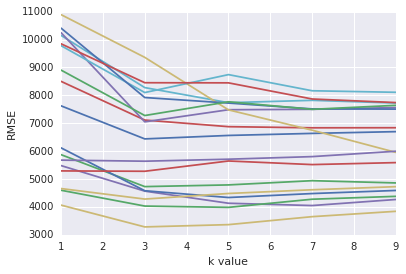

In [15]:
for feature in cars_col_k_rmse['feature'].unique().tolist():
    x = cars_col_k_rmse.loc[cars_col_k_rmse['feature']==feature, 'k']
    y = cars_col_k_rmse.loc[cars_col_k_rmse['feature']==feature, 'rmse']
    plt.plot(x,y, label=feature)

plt.xlabel('k value')
plt.ylabel('RMSE')
sns.set_style('white')

In [16]:
feature_average_rmse = []
for feature in cars_col_k_rmse['feature'].unique():
    average_rmse = cars_col_k_rmse.loc[cars_col_k_rmse['feature']==feature, 'rmse'].mean()
    feature_average_rmse.append([feature, average_rmse])
#turn into dataframe
feature_average_rmse = pd.DataFrame(feature_average_rmse, columns=['feature', 'average_rmse'])
#sort
feature_average_rmse = feature_average_rmse.sort_values(by=['average_rmse'], ascending=True)

In [17]:
feature_average_rmse

,feature,average_rmse
4,engine_size,3640.500697
7,horsepower,4252.585329
3,curb_weight,4498.044284
16,width,4551.611642
6,highway_mpg,4819.743786
1,city_mpg,5037.142622
8,length,5463.366012
15,wheel_base,5764.317607
0,bore,6790.389200
2,compression_ratio,7231.982133


# Multivariate model using the 6 best predictors

In [18]:
feature_sets = feature_average_rmse.iloc[0:7]['feature'].tolist()
feature_sets.remove('engine_size')
models_rmse_k5 = []

for set in range(2,len(feature_sets)+1):
    print(feature_sets[:set])
    k_rmse = knn_train_test(cars, feature_sets[:set], 'price', 5)
    for key, value in k_rmse.items():
        models_rmse_k5.append([feature_sets[:set], value])
#construct data frame
models_rmse_k5 = pd.DataFrame(models_rmse_k5, columns = ['feature', 'rmse'])
models_rmse_k5['rmse'] = models_rmse_k5['rmse'].astype(float)

['horsepower', 'curb_weight']
['horsepower', 'curb_weight', 'width']
['horsepower', 'curb_weight', 'width', 'highway_mpg']
['horsepower', 'curb_weight', 'width', 'highway_mpg', 'city_mpg']
['horsepower', 'curb_weight', 'width', 'highway_mpg', 'city_mpg', 'length']


In [19]:
models_rmse_k5 = models_rmse_k5.sort_values(by='rmse', ascending=True)
models_rmse_k5

,feature,rmse
1,"[horsepower, curb_weight, width]",3189.611202
3,"[horsepower, curb_weight, width, highway_mpg, ...",3242.085862
0,"[horsepower, curb_weight]",3267.607705
2,"[horsepower, curb_weight, width, highway_mpg]",3278.402973
4,"[horsepower, curb_weight, width, highway_mpg, ...",3601.107807


In [20]:
feature_sets = models_rmse_k5.iloc[0:3]['feature'].tolist()
models_rmse = []
ks = [x for x in range(1,26)]

for feature_set in feature_sets:
    print(feature_set)
    k_rmse = knn_train_test(cars, feature_set, 'price', ks)
    for key, value in k_rmse.items():
        models_rmse.append([str(feature_set), key, value])
#construct data frame
models_rmse = pd.DataFrame(models_rmse, columns = ['feature_set', 'k', 'rmse'])
models_rmse['k'] = models_rmse['k'].astype(int)
models_rmse['rmse'] = models_rmse['rmse'].astype(float)
models_rmse = models_rmse.sort_values(by=['feature_set', 'k'], ascending=True)

['horsepower', 'curb_weight', 'width']
['horsepower', 'curb_weight', 'width', 'highway_mpg', 'city_mpg']
['horsepower', 'curb_weight']


In [21]:
models_rmse

,feature_set,k,rmse
25,"['horsepower', 'curb_weight', 'width', 'highwa...",1,3261.615226
26,"['horsepower', 'curb_weight', 'width', 'highwa...",2,2926.812278
27,"['horsepower', 'curb_weight', 'width', 'highwa...",3,3061.633299
28,"['horsepower', 'curb_weight', 'width', 'highwa...",4,3124.276827
29,"['horsepower', 'curb_weight', 'width', 'highwa...",5,3242.085862
30,"['horsepower', 'curb_weight', 'width', 'highwa...",6,3417.692363
31,"['horsepower', 'curb_weight', 'width', 'highwa...",7,3665.631709
32,"['horsepower', 'curb_weight', 'width', 'highwa...",8,3832.169926
33,"['horsepower', 'curb_weight', 'width', 'highwa...",9,3867.415662
34,"['horsepower', 'curb_weight', 'width', 'highwa...",10,4003.665253


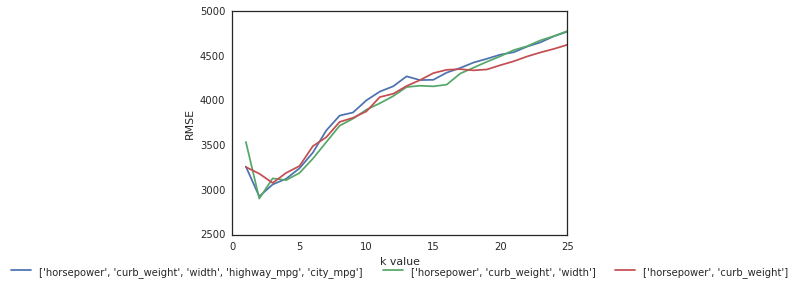

In [22]:
for feature_set in models_rmse['feature_set'].unique().tolist():
    x = models_rmse.loc[models_rmse['feature_set']==feature_set, 'k']
    y = models_rmse.loc[models_rmse['feature_set']==feature_set, 'rmse']
    plt.plot(x,y, label=feature_set)

plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
sns.set_style('white')

# The 3 and 5 variable models perform the best

    both perform best with less than 5 neighbours
    this is likely due to the low number of rows and the variability